# Encoding states

### The purpose of this section is to show how I will be encoding my states in order to be correctly used by the Quantum Singular Value Decomposition code. Note code provided for the matrix but does not really matter just to show proof of concept

#### Initial Imports

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import math
import qiskit_aer


from qiskit import transpile, assemble
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit_aer import AerSimulator
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit.visualization import plot_histogram

### Setup

##### note the setup is only for verification purposes

In [18]:
# dimension =5
# # creates a random square matrix
#matrix = np.random.randint(0,2, size = (dimension,dimension))
# print(matrix)

##### user matrix we are testing

In [19]:
b = np.array([1,2,3,4]) #sample vector

### Encoding of states

In [ ]:

# def encode_row(vector,qc):

#     #normalizing 
#     b = np.array([1,2,3,4]) #sample vector 
#     # vector b
#     norm_b = np.linalg.norm(b)
#     # print(norm_b)
#     b = b/norm_b
#     print(b)

#     #1 bit quantum circuit
#     #
#     qc = QuantumCircuit(2)

#     qc.initialize(b,qc.qubits) #

#     res=0

#     qc.draw(output='text')
#modified code to be N-qubit
def encode_row(vector: list[int], qc) -> None:

    vector = np.array(vector, dtype=np.complex128)  
    norm = np.linalg.norm(vector)
    if norm == 0:
        raise ValueError("Cannot encode a zero vector")
    normalized_vector = vector / norm  

    padded_length = 2**int(np.ceil(np.log2(len(normalized_vector))))
    if len(normalized_vector) < padded_length:
        normalized_vector = np.pad(normalized_vector, (0, padded_length - len(normalized_vector)), 'constant')

    num_qubits = int(np.log2(len(normalized_vector)))
    qc = QuantumCircuit(num_qubits)

    qc.initialize(normalized_vector, qc.qubits)

    qc.draw(output="mpl")
    return qc


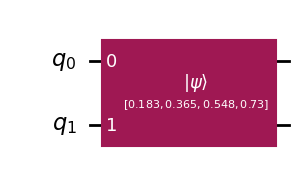

In [22]:
qc=QuantumCircuit()
store = encode_row(b,qc)
store.draw(output='mpl')

### Encoding Matrix
##### The way this work is by encoding each row into its on circuit

In [23]:
def encode_matrix(matrix:list[list[int]])-> list[QuantumCircuit]:
    circuits = []
    for row in matrix:
        qc = QuantumCircuit()  
        encoded_qc = encode_row(row, qc)  
        circuits.append(encoded_qc) 
    return circuits